<a href="https://colab.research.google.com/github/RajiReddy-A/Cactus-Prediction/blob/master/Cactus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications.resnet50 import preprocess_input

Using TensorFlow backend.


In [0]:

batch_size = 30

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        #preprocessing_function=preprocess_input
        rescale=1./255
        #shear_range=0.2,
        #zoom_range=0.2,
        #horizontal_flip=True
        )

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(
        #preprocessing_function=preprocess_input
        rescale=1./255
        )

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Colab Notebooks/Cactus/data_unzip/training_set',  # this is the target directory
        target_size=(100, 100),  # all images will be resized to 150x150
        color_mode="rgb",
        batch_size=batch_size,
        #shuffle=False,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels


Found 17500 images belonging to 2 classes.


In [0]:
# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/Colab Notebooks/Cactus/data_unzip/validation_set',
        target_size=(100, 100),
        color_mode="rgb",
        batch_size=batch_size,
        #shuffle=False,
        class_mode='binary')

Found 4000 images belonging to 2 classes.


In [0]:
train_generator.labels.size,validation_generator.labels.size

(17500, 4000)

In [0]:
train_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras

In [0]:
train_generator.image_shape

(100, 100, 3)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=train_generator.image_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

W0621 05:49:53.099526 140103280080768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0621 05:49:53.152145 140103280080768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0621 05:49:53.161823 140103280080768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0621 05:49:53.205437 140103280080768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0621 05:49:53.210755 140103280080768 deprecation_wrapp

In [0]:
model_history = model.fit_generator(
                train_generator,
                steps_per_epoch= train_generator.labels.size//batch_size,
                epochs=5,
                validation_data=validation_generator,
                validation_steps= validation_generator.labels.size//batch_size,
                use_multiprocessing=True,
                workers=10
                                    )

Epoch 1/5


/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py:47: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


583/583 [==============================] - 800s 1s/step - loss: 0.1143 - acc: 0.9658 - val_loss: 0.1387 - val_acc: 0.9283
Epoch 2/5
583/583 [==============================] - 771s 1s/step - loss: 0.0338 - acc: 0.9907 - val_loss: 0.1839 - val_acc: 0.9251
Epoch 3/5
583/583 [==============================] - 771s 1s/step - loss: 0.0357 - acc: 0.9895 - val_loss: 0.0441 - val_acc: 0.9815
Epoch 4/5
583/583 [==============================] - 791s 1s/step - loss: 0.0340 - acc: 0.9913 - val_loss: 0.0612 - val_acc: 0.9825
Epoch 5/5
583/583 [==============================] - 766s 1s/step - loss: 0.0390 - acc: 0.9895 - val_loss: 0.2588 - val_acc: 0.9226


In [0]:
#model.save('/content/drive/My Drive/Colab Notebooks/Cactus/models/model1.h5')

NameError: ignored

In [0]:
from keras.models import load_model
saved_model = load_model('/content/drive/My Drive/Colab Notebooks/Cactus/models/model1.h5')

W0621 15:43:46.875041 140060105275264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0621 15:43:46.922400 140060105275264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0621 15:43:46.969038 140060105275264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0621 15:43:46.971959 140060105275264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0621 15:43:46.973279 140060105275264 deprecation_wrap

In [0]:
import numpy as np
test_img = load_img('/content/drive/My Drive/Colab Notebooks/Cactus/data_unzip/training_set/no_cactus/Sinplanta.1.jpg', target_size=(100, 100))
test_img
y = img_to_array(test_img)
y = y/255
y = np.expand_dims(y, axis=0)
#y.shape, y
#images = np.vstack([x, y])

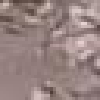

In [0]:
test_img

In [0]:
saved_model.predict_classes(y)

array([[1]], dtype=int32)

# IGNORE BELOW CELLS





# Learning Rate Finder

In [0]:
data_list = []
batch_index = 0

while batch_index <= train_generator.batch_index:
    data = train_generator.next()
    data_list.append(data[0])
    batch_index = batch_index + 1



NameError: ignored

In [0]:
import numpy as np
# now, data_array is the numeric data of whole images
train_data_array = np.asarray(data_list)
train_labels_array = train_generator.labels


In [0]:
train_data_array = train_data_array.reshape(876*20, 100, 100, 3)

In [0]:
train_data_array.shape

(17520, 100, 100, 3)

In [0]:
!pip install keras_lr_finder

In [0]:
from keras_lr_finder import LRFinder
# model is a Keras model
lr_finder = LRFinder(model)

# Train a model with batch size 512 for 5 epochs
# with learning rate growing exponentially from 0.0001 to 1
lr_finder.find(train_data_array, train_labels_array, start_lr=0.0001, end_lr=0.01, batch_size=512, epochs=5)

Epoch 1/5
17520/17520 [==============================] - 13s 727us/step - loss: 0.6146 - acc: 0.7376
Epoch 2/5
17520/17520 [==============================] - 12s 683us/step - loss: 0.5754 - acc: 0.7509
Epoch 3/5
17520/17520 [==============================] - 12s 689us/step - loss: 0.5745 - acc: 0.7509
Epoch 4/5
17520/17520 [==============================] - 12s 686us/step - loss: 0.5904 - acc: 0.7509
Epoch 5/5
17520/17520 [==============================] - 12s 678us/step - loss: 0.5816 - acc: 0.7509


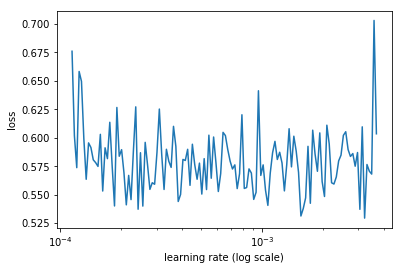

In [0]:
# Plot the loss, ignore 20 batches in the beginning and 5 in the end
lr_finder.plot_loss(n_skip_beginning=5, n_skip_end=40)

#                                                                             **USING RESNET50**











In [0]:
# create the base pre-trained model
from keras.applications.resnet50 import ResNet50
from keras.layers import Dense,GlobalAveragePooling2D,Input, MaxPooling2D, BatchNormalization
from keras.models import Model,load_model
input_tensor = Input(shape=(100, 100, 3))
base_model = ResNet50(input_tensor=input_tensor,weights='imagenet',include_top=False)

for layer in base_model.layers[:-1]:
    layer.trainable=False

#x = base_model.output
#x = GlobalAveragePooling2D(data_format='channels_last')(x)
#x = MaxPooling2D(pool_size=(2, 2), data_format='channels_last')(x)
#x = Dense(num_classes, activation='softmax')(x)

#resnet50model = Model(base_model.input, x)

resnet50model = Sequential()
resnet50model.add(base_model)
# Add new layers
"""
resnet50model.add(Dense(512, activation='linear'))
resnet50model.add(BatchNormalization())
resnet50model.add(Dropout(0.7))
resnet50model.add(Dense(512, use_bias=True,activation='linear'))
resnet50model.add(BatchNormalization())
resnet50model.add(Dropout(0.7))
"""
resnet50model.add(Flatten())
resnet50model.add(Dense(512, use_bias=True,activation='relu'))
resnet50model.add(BatchNormalization())
resnet50model.add(Dropout(0.5))
resnet50model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:
resnet50model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

resnet50model_history = resnet50model.fit_generator(
                                    train_generator,
                                    steps_per_epoch=batch_size,
                                    epochs=10,
                                    validation_data=validation_generator,
                                    validation_steps=batch_size)

Epoch 1/10
20/20 [==============================] - 148s 7s/step - loss: 0.7314 - acc: 0.8050 - val_loss: 2.3126 - val_acc: 0.5200
Epoch 2/10
20/20 [==============================] - 146s 7s/step - loss: 0.1728 - acc: 0.9375 - val_loss: 1.6466 - val_acc: 0.6275
Epoch 3/10
20/20 [==============================] - 155s 8s/step - loss: 0.1552 - acc: 0.9525 - val_loss: 1.8227 - val_acc: 0.6300
Epoch 4/10
20/20 [==============================] - 153s 8s/step - loss: 0.1235 - acc: 0.9650 - val_loss: 0.8902 - val_acc: 0.7550
Epoch 5/10
20/20 [==============================] - 157s 8s/step - loss: 0.0681 - acc: 0.9750 - val_loss: 0.7847 - val_acc: 0.7875
Epoch 6/10
20/20 [==============================] - 143s 7s/step - loss: 0.0937 - acc: 0.9725 - val_loss: 0.4751 - val_acc: 0.8375
Epoch 7/10
20/20 [==============================] - 148s 7s/step - loss: 0.0753 - acc: 0.9700 - val_loss: 0.2630 - val_acc: 0.9100
Epoch 8/10
20/20 [==============================] - 148s 7s/step - loss: 0.0715 - a

for layer in base_model.layers[:]:
    layer.trainable=False                              ----------    85 accuracy- epochs 20
    
for layer in base_model.layers[:-1]:
    layer.trainable=False                              ----------    86 accuracy- epochs 20

# Resources

https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly

https://stackoverflow.com/questions/44842097/how-to-get-list-of-values-in-imagedatagenerator-flow-from-directory-keras

https://github.com/surmenok/keras_lr_finder

https://stackoverflow.com/questions/45943675/meaning-of-validation-steps-in-keras-sequential-fit-generator-parameter-list

https://stackoverflow.com/questions/43469281/how-to-predict-input-image-using-trained-model-in-keras

https://github.com/keras-team/keras/issues/9049